# Glow-ViT results visualized

This is a script that's intended to visualize the performance of various Glow-ViT models evaluated on the low-light exposure datasets we currently have:

1. wildlife_very_dark_test
2. wildlife_grayscale
3. wildlife_less_saturated
4. wildlife_underexposed

## Results:

|eval_loss| original | very dark | illuminate | mixed | very dark test | grayscale | less saturated | underexposed |
|--|---------|------------|------------|-------|----------------|-----------|----------------|----|
|Glow-ViT|0.1246|4.5018|0.0225|0.5657|4.3495|0.2021|0.176|0.351|
|Glow-ViT-Dark|0.2078|0.5554|0.1712|0.2502|0.4528|0.2992 |0.3231      |0.2702|
|Glow-ViT-Illuminate|0.1177|2.1939|0.1064|0.4042|2.2027|0.3929     |0.4334          |0.5756|
|Glow-ViT-Mix|0.0744|0.3715|0.0243|0.1449|0.1396       | 0.0776   | 0.0707 |0.0472|


### Evaluation speed

|eval_samples_per_second| original | very dark | illuminate | mixed | very dark test | grayscale | less saturated | underexposed |
|--|---------|------------|------------|-------|----------------|-----------|----------------|----|
|Glow-ViT|13.22|13.087|13.589|12.81|21.118|13.231|20.086|20.162|
|Glow-ViT-Dark|13.027|13.189|13.249|12.587|19.035|12.997                |21.418|21.862|
|Glow-ViT-Illuminate|12.809|12.857|13.223|11.938|19.711             |12.803            |19.972|20.094|
|Glow-ViT-Mix|14.038|13.294 |13.956|12.778|21.091       | 13.254   | 21.135 |20.766|

In [4]:
import matplotlib.pyplot as plt
import numpy as np

datasets = ["very_dark_test", "grayscale", "less_saturated", "underexposed"]
datasets1 = ["original", "very_dark", "illuminate", "mixed", "very_dark_test", "grayscale", "less_saturated", "underexposed"]
models = ["Glow-ViT", "Glow-ViT-dark", "Glow-ViT-illuminate", "Glow-ViT-mix"]
eval_loss = {
    "Glow-ViT": [0.1246, 4.5018, 0.0225, 0.5657, 4.3495, 0.2021, 0.176, 0.351],
    "Glow-ViT-dark": [0.2078, 0.5554, 0.1712, 0.2502, 0.4528, 0.2992, 0.3231, 0.2702],
    "Glow-ViT-illuminate": [0.1177, 2.1939, 0.1064, 0.4042, 2.2027, 0.3929, 0.4334, 0.5756],
    "Glow-ViT-mix": [0.0744, 0.3715, 0.0243, 0.1449, 0.1396, 0.0776, 0.0707, 0.0472]
}
eval_samples_per_second = {
    "Glow-ViT": [21.118, 13.231, 20.086, 20.162],
    "Glow-ViT-dark": [19.035, 12.997, 21.418, 21.862],
    "Glow-ViT-illuminate": [19.711, 12.803, 19.972, 20.094],
    "Glow-ViT-mix": [21.091, 13.254, 21.135, 20.766]
}

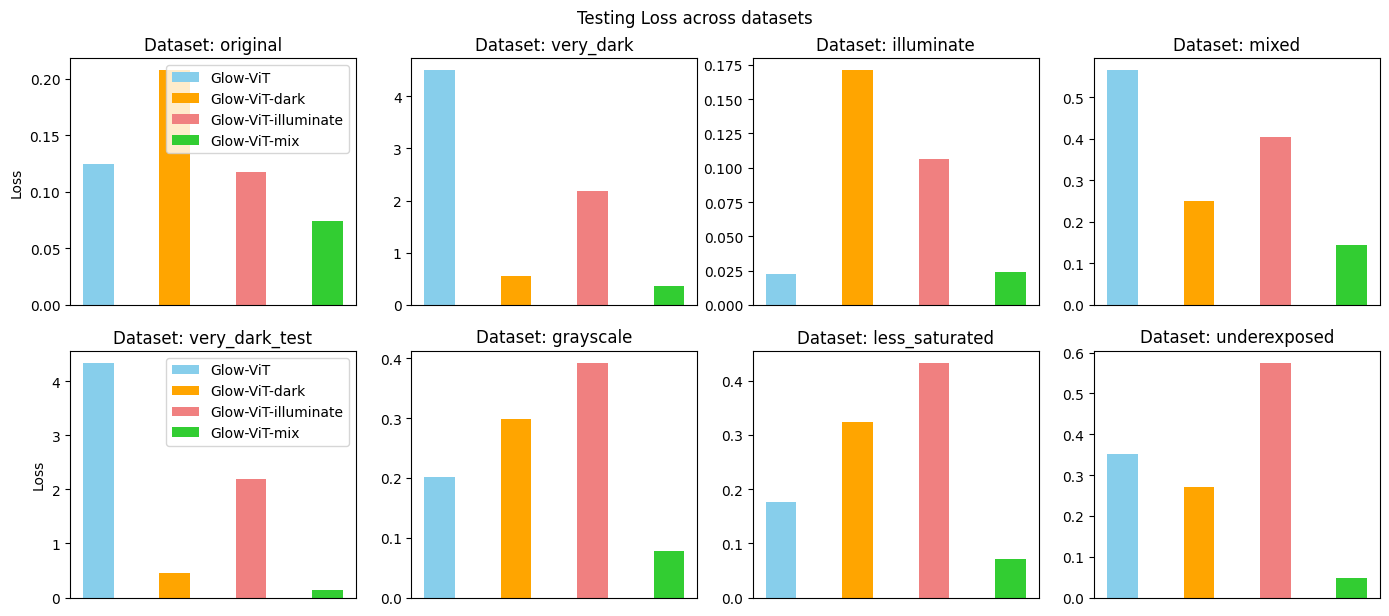

In [5]:

x = np.arange(len(models))
width = 0.4  # the width of the bars
colors = ["skyblue", "orange", "lightcoral", "limegreen"]

fig, axes = plt.subplots(2, 4, figsize=(14, 6), sharex=True)
axes = axes.flatten()

for i, dataset in enumerate(datasets1):
    ax = axes[i]
    for j, model in enumerate(models):
        ax.bar(x[j], eval_loss[model][i], width, label=model, color=colors[j])

    # Titles and labels
    ax.set_title(f"Dataset: {dataset}")
    ax.set_xticks([])
    # ax.set_xticklabels(models)
    if i % 4 == 0:
        ax.set_ylabel("Loss")
        ax.legend()

# General layout adjustments
plt.tight_layout()
plt.suptitle("Testing Loss across datasets", fontsize=12, y=1.02)
plt.show()


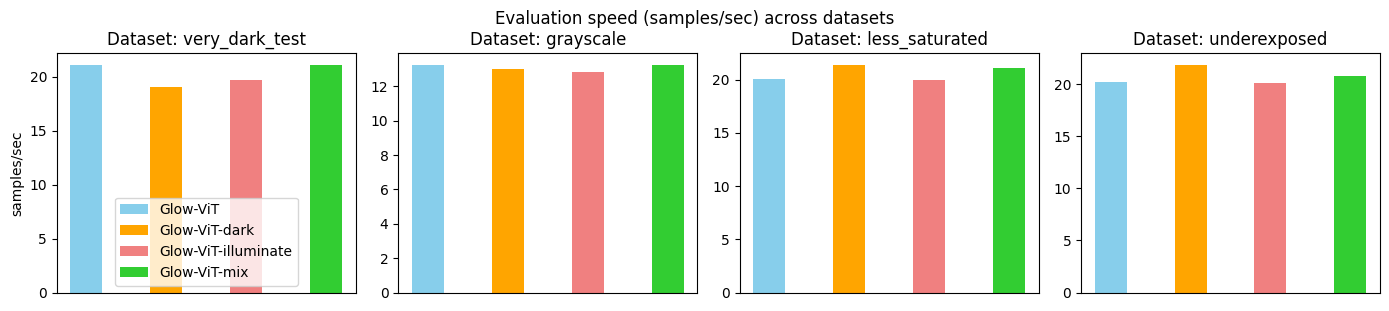

In [6]:

x = np.arange(len(models))
width = 0.4  # the width of the bars
colors = ["skyblue", "orange", "lightcoral", "limegreen"]

fig, axes = plt.subplots(1, 4, figsize=(14, 3), sharex=True)
axes = axes.flatten()

for i, dataset in enumerate(datasets):
    ax = axes[i]
    for j, model in enumerate(models):
        ax.bar(x[j], eval_samples_per_second[model][i], width, label=model, color=colors[j])

    # Titles and labels
    ax.set_title(f"Dataset: {dataset}")
    ax.set_xticks([])
    # ax.set_xticklabels(models)
    if i % 4 == 0:
        ax.set_ylabel("samples/sec")
        ax.legend(loc='lower center')

# General layout adjustments
plt.tight_layout()
plt.suptitle("Evaluation speed (samples/sec) across datasets", fontsize=12, y=1.02)
plt.show()
